# Lab 2.01 - Australian Athletes (ais)

Import all necessary Python libraries and load the AIS dataset from lab exercise 1.01. Also include the code for setting the index and conversion to categorical variables!

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

In [2]:
ais = pd.read_csv("../data/ais.csv")          # Read the data
ais.head()     

,id,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [3]:
ais.set_index(['id'])
ais.sex = ais.sex.astype('category')
ais.sport = ais.sport.astype('category')

Use an appropriate chart type to visualise the following variables. Are several chart types suitable? Make one of each! Note how some graphs nevertheless give a better insight into the data than other types of graphs.

- `sex`
- `sport`
- `ht` (show this also divided by `sex` and by `sport`.)

<Axes: xlabel='count', ylabel='sex'>

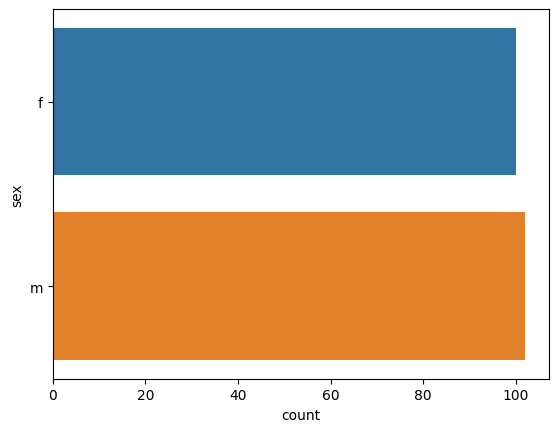

In [4]:
sns.countplot(data=ais, y='sex')

<Axes: xlabel='count', ylabel='sport'>

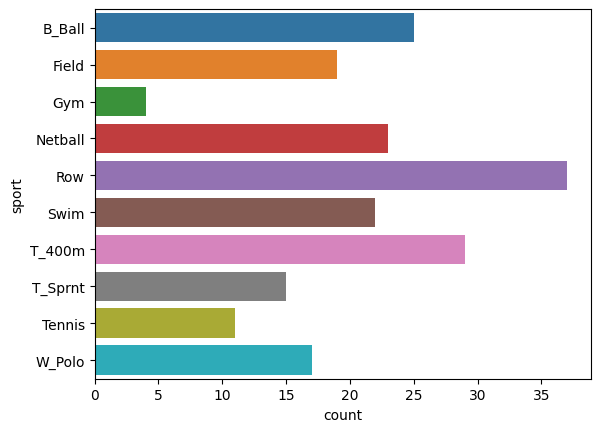

In [5]:
sns.countplot(data=ais, y='sport')

<Axes: xlabel='count', ylabel='sport'>

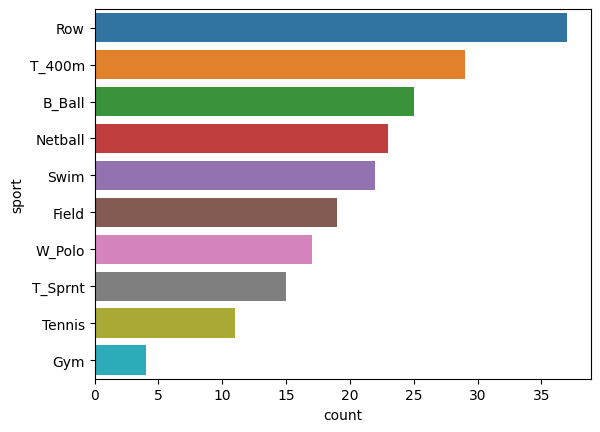

In [6]:
sns.countplot(data=ais, y='sport', order=ais.sport.value_counts().index)

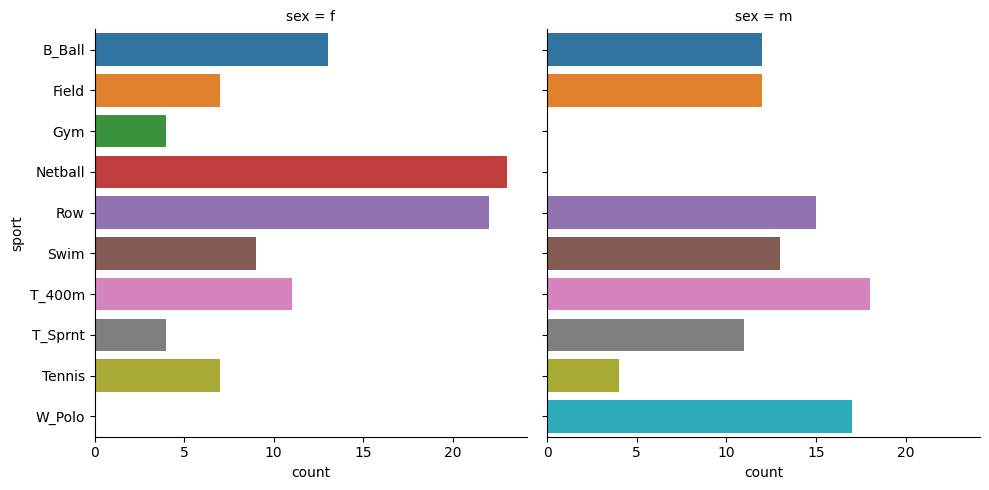

In [10]:
sns.catplot(data=ais, kind='count', col='sex', y="sport")

<Axes: xlabel='ht', ylabel='Density'>

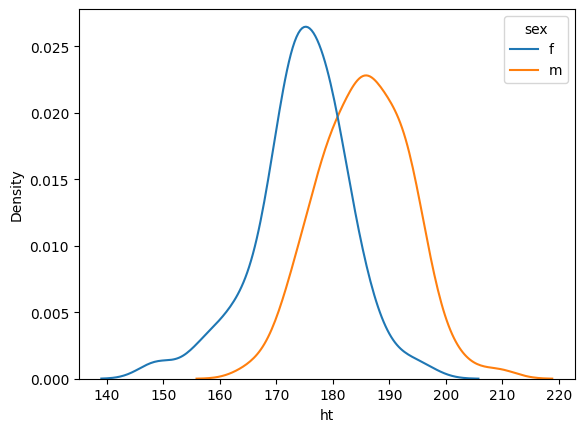

In [11]:
sns.kdeplot(data=ais, x='ht', hue='sex')

<Axes: xlabel='ht', ylabel='sex'>

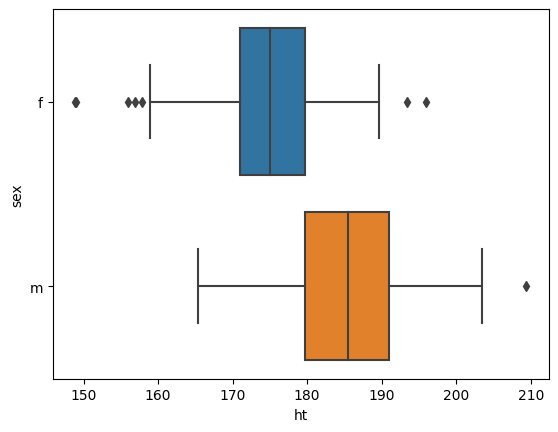

In [13]:
sns.boxplot(data=ais, x='ht', y='sex')

<Axes: xlabel='ht', ylabel='sport'>

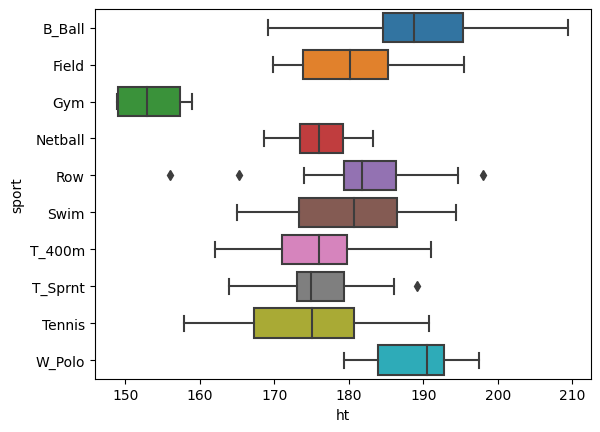

In [14]:
sns.boxplot(data=ais, x='ht', y='sport')

<Axes: xlabel='ht', ylabel='Density'>

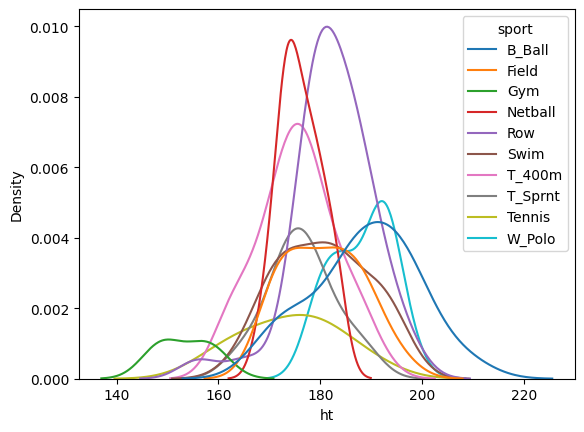

In [16]:
sns.kdeplot(data=ais, x='ht', hue='sport')

Select the following subsets from the dataset and calculate for each the appropriate measures of central tendency (and, when possible, dispersion) of the variables `ht` and `sex`:

1. the rowers
2. the rowers, netball and tennis players together
3. the female basketball players and rowers together

In [25]:
row=ais[ais.sport=='Row']
row_net_tennis=ais[(ais.sport=='Row') | (ais.sport=='Netball') | (ais.sport=='Tennis')]
f_basket_row=ais[(ais.sex == 'f') & ((ais.sport=='B_Ball') | (ais.sport=='Row'))]

In [18]:
row.sex.mode()

0    f
Name: sex, dtype: category
Categories (2, object): ['f', 'm']

In [26]:
print(f'Frequencies of row.sex:\n{row.sex.value_counts()}')
print(f'Frequencies of row_net_tennis.sex:\n{row_net_tennis.sex.value_counts()}')
print(f'Frequencies of f_basket_row.sex:\n{f_basket_row.sex.value_counts()}')

Frequencies of row.sex:
f    22
m    15
Name: sex, dtype: int64
Frequencies of row_net_tennis.sex:
f    52
m    19
Name: sex, dtype: int64
Frequencies of f_basket_row.sex:
f    35
m     0
Name: sex, dtype: int64


In [29]:
print(f'===Measure for central tendency and dispersion===')
print(f'---Rowers:---\n{row.ht.describe()}')
print(f'---Rowers and Netballers and Tennis players:---\n{row_net_tennis.ht.describe()}')
print(f'---Female Basketballers and Rowers:---\n{f_basket_row.ht.describe()}')

print(f'---Median of female basketballers and rowers:---\n{f_basket_row.ht.median()}')
print(f"---Median of female basketballers and rowers:---\n{f_basket_row.ht.describe()['50%']}")
print(f"---IQR Female basketballers and rowers:---\n{f_basket_row.ht.describe()['75%']-f_basket_row.ht.describe()['25%']}")

===Measure for central tendency and dispersion===
---Rowers:---
count     37.000000
mean     182.375676
std        7.798376
min      156.000000
25%      179.300000
50%      181.800000
75%      186.300000
max      198.000000
Name: ht, dtype: float64
---Rowers and Netballers and Tennis players:---
count     71.000000
mean     179.066197
std        7.936371
min      156.000000
25%      174.250000
50%      179.500000
75%      183.400000
max      198.000000
Name: ht, dtype: float64
---Female Basketballers and Rowers:---
count     35.000000
mean     180.125714
std        7.144078
min      156.000000
25%      177.400000
50%      179.700000
75%      184.650000
max      195.900000
Name: ht, dtype: float64
---Median of female basketballers and rowers:---
179.7
---Median of female basketballers and rowers:---
179.7
---IQR Female basketballers and rowers:---
7.249999999999972


## Check your answers

As a check, here are the results of the last question. First the frequencies and mode of the variable `sex`:

|           | Selection 1 | Selection 2 | Selection 3 |
| :-------- | :---------- | :---------- | :---------- |
| **f**     | 22          | 52          | 35          |
| **m**     | 15          | 19          | 0           |
| **mode**  | f           | f           | f           |

Then the relevant measures for central tendency and dispersion for `ht` (max. 3 decimal places):

| Statistic  | Selection 1 | Selection 2 | Selection 3 |
| :--------- | :---------- | :---------- | :---------- |
| mean       | 182.376     | 179.066     | 180.126     |
| stdev      | 7.798       | 7.936       | 7.144       |
| min        | 156         | 156         | 156         |
| Q1         | 179.3       | 174.25      | 177.4       |
| median     | 181.8       | 179.5       | 179.7       |
| Q3         | 186.3       | 183.4       | 184.65      |
| max        | 198         | 198         | 195.9       |
| IQR        | 7           | 9.15        | 7.250       |